In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [64]:
# import cdc data
cdc = pd.read_csv("data/cdc_deaths_by_race_age.csv") 
cdc["covid_deaths"] = cdc["covid_19_deaths"] + cdc["pneumonia_and_covid_19_deaths"]

# import our data
ours = pd.read_csv("data/Race Data Entry - Tracker Commits.csv", parse_dates=["date"])
ours.drop([col for col in ours.columns if "Unnamed" in col], axis=1, inplace=True)

In [65]:
ours.loc[ours["state"] == "AL"].sort_values("date")

,date,state,update_time,last_check,positives_total,positives_white,positives_black,positives_latinx,positives_asian,positives_aiain,...,negatives_aian,negatives_nhpi,negatives_multiracial,negatives_other,negatives_race_unknown,negatives_percent_race_unknown,negatives_hispanic,negatives_nonhispanic,negatives_ethnicity_unknown,negatives_percent_ethnicity_unknown
897,2020-04-12,AL,NaN,NaN,3582,1657,1279.0,NaN,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841,2020-04-15,AL,4/15/20 0:00,NaN,4241,1996,1594.0,NaN,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,2020-04-19,AL,4/19/20 0:00,NaN,4903,2300,1831.0,NaN,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,2020-04-22,AL,4/23/20 0:00,NaN,4903,2296,1842.0,NaN,42.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,2020-04-26,AL,4/26/20 0:00,4/26/20 22:40,6421,2947,2411.0,NaN,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,2020-04-29,AL,4/29/20 0:00,4/29/20 23:04,6925,3186,2646.0,NaN,52.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,2020-05-03,AL,5/3/20 0:00,5/3/20 22:27,7888,3518,3002.0,NaN,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,2020-05-06,AL,5/6/20 0:00,5/6/20 22:19,8691,3877,3351.0,NaN,57.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,2020-05-10,AL,5/10/20 0:00,5/10/20 22:24,9889,4333,3789.0,NaN,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,2020-05-13,AL,5/12/20 0:00,5/13/20 22:16,9889,4268,3841.0,NaN,59.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
cdc.loc[cdc["state"] == "Alabama"]

,date_as_of,start_week,end_week,state,age_group,race_and_ethnicity,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,Footnote,covid_deaths
97,6/3/20,2/1/20,5/30/20,Alabama,Under 1 year,Non-Hispanic White,0.0,35.0,0.0,0.0,0.0,0.0,NaN,0.0
98,6/3/20,2/1/20,5/30/20,Alabama,1-4 years,Non-Hispanic White,0.0,15.0,0.0,0.0,NaN,NaN,One or more data cells have counts between 1�9...,0.0
99,6/3/20,2/1/20,5/30/20,Alabama,5-14 years,Non-Hispanic White,0.0,21.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1�9...,0.0
100,6/3/20,2/1/20,5/30/20,Alabama,15-24 years,Non-Hispanic White,0.0,96.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1�9...,0.0
101,6/3/20,2/1/20,5/30/20,Alabama,25-34 years,Non-Hispanic White,0.0,198.0,NaN,0.0,NaN,NaN,One or more data cells have counts between 1�9...,0.0
102,6/3/20,2/1/20,5/30/20,Alabama,35-44 years,Non-Hispanic White,NaN,335.0,17.0,NaN,NaN,19.0,One or more data cells have counts between 1�9...,NaN
103,6/3/20,2/1/20,5/30/20,Alabama,45-54 years,Non-Hispanic White,NaN,748.0,33.0,NaN,NaN,47.0,One or more data cells have counts between 1�9...,NaN
104,6/3/20,2/1/20,5/30/20,Alabama,55-64 years,Non-Hispanic White,26.0,1849.0,137.0,NaN,17.0,174.0,One or more data cells have counts between 1�9...,NaN
105,6/3/20,2/1/20,5/30/20,Alabama,65-74 years,Non-Hispanic White,59.0,2817.0,188.0,20.0,16.0,243.0,NaN,79.0
106,6/3/20,2/1/20,5/30/20,Alabama,75-84 years,Non-Hispanic White,86.0,3598.0,263.0,28.0,11.0,332.0,NaN,114.0


In [19]:
cdc["race_and_hispanic_origin"].unique()

array(['Total Deaths', 'Non-Hispanic White', 'Non-Hispanic Black',
       'Non-Hispanic American Indian or Alaska Native',
       'Non-Hispanic Asian',
       'Non-Hispanic Native Hawaiian or Other Pacific Islander',
       'Non-Hispanic More than one race', 'Hispanic or Latino', 'Unknown'],
      dtype=object)

## Does the CRDT Data Align with the CDC's Data?

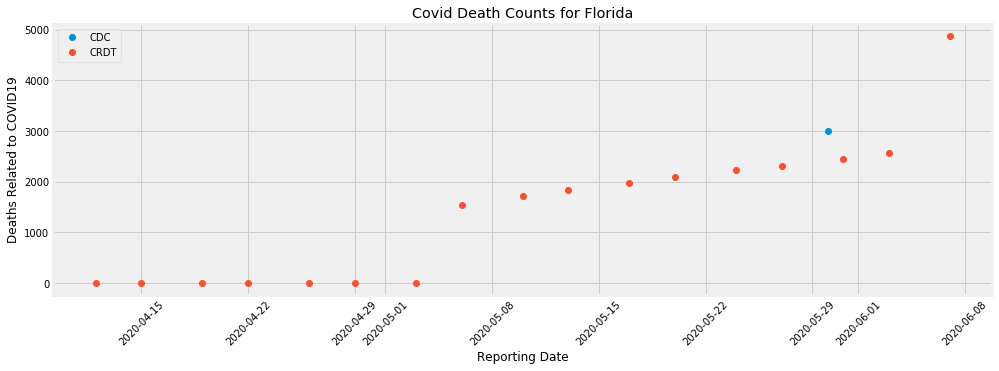

In [71]:
state_cdc = "Florida"
state_ours = "FL"

cdc_to_plot = cdc.groupby(["state", "end_week"])["covid_deaths"].sum().reset_index()
cdc_to_plot = cdc_to_plot.loc[cdc_to_plot["state"] == state_cdc]
cdc_to_plot["end_week"] = pd.to_datetime(cdc_to_plot["end_week"]).dt.date
ours_to_plot = ours.groupby(["state", "date"])["total_deaths"].sum().reset_index()
ours_to_plot = ours_to_plot.loc[ours_to_plot["state"] == state_ours]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(cdc_to_plot["end_week"], cdc_to_plot["covid_deaths"], label="CDC")
ax.plot_date(ours_to_plot["date"], ours_to_plot["total_deaths"], label="CRDT")
plt.xticks(rotation=45)
plt.xlabel("Reporting Date")
plt.ylabel("Deaths Related to COVID19")
plt.title(f"Covid Death Counts for {state_cdc}")
plt.legend()
plt.show()

In [75]:
cdc.age_group.unique()

array(['All Ages', 'Under 1 year', '1-4 years', '5-14 years',
       '15-24 years', '25-34 years', '35-44 years', '45-54 years',
       '55-64 years', '65-74 years', '75-84 years', '85 years and over'],
      dtype=object)